In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
### Housing income by Zip code info is loaded in and unncessary columns are dropped
housingRAW = pd.read_csv('../Data/Raw/HousingPrice_by_Zip.csv') 
housingRAW.head()
h_droped = ['RegionName','StateName', 'RegionType','Metro','CountyName']
housingRAW.drop(h_droped,axis=1,inplace=True)  
housingRAW.head()

,RegionID,SizeRank,State,City,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,61639,0,NY,New York,241494.0,239990.0,240071.0,240045.0,240594.0,241262.0,...,1184447.0,1173676.0,1168681.0,1163918.0,1160819.0,1160123.0,1152662.0,1144433.0,1134469.0,1119691.0
1,84654,1,IL,Chicago,203617.0,203466.0,203071.0,202940.0,202394.0,202572.0,...,476309.0,476561.0,477007.0,478256.0,480236.0,482968.0,485700.0,488346.0,490977.0,493431.0
2,61637,2,NY,New York,208136.0,208179.0,208295.0,209036.0,210115.0,210999.0,...,1027995.0,1031797.0,1034790.0,1034950.0,1038246.0,1049714.0,1051969.0,1049421.0,1042315.0,1042278.0
3,91982,3,TX,Katy,200011.0,200258.0,200062.0,198875.0,197740.0,197075.0,...,336436.0,337509.0,338366.0,339073.0,340411.0,341809.0,344034.0,346734.0,350619.0,354287.0
4,84616,4,IL,Chicago,276628.0,276376.0,275866.0,275727.0,275062.0,275149.0,...,620228.0,619997.0,619999.0,621109.0,622569.0,625369.0,628093.0,631084.0,634026.0,636670.0


In [3]:
### The same procedure is followed for the brewery data
breweryRAW = pd.read_csv('../Data/Raw/Brewery.csv') 
breweryRAW.head()
b_droped = ['id','country', 'hours','keys','latitude','longitude','menus','name','province','twitter','websites']
breweryRAW.drop(b_droped,axis=1,inplace=True)  
breweryRAW.head()

,address,categories,city,postalCode
0,Syr Airport,Brewery,Syracuse,NaN
1,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,53212
2,608 4th St,Brewery Downtown Clovis,Clovis,93612
3,1103 Mills St,breweries & brew pubs,Black Earth,53515-9454
4,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,47130


In [4]:
### The same procedure is followed for the brewery data
popRAW = pd.read_csv('../Data/Raw/population_by_zip_2010.csv') 
popRAW.head()
p_droped = ['gender','minimum_age','maximum_age','geo_id']
popRAW.drop(p_droped,axis=1,inplace=True)  
popRAW.head()

,population,zipcode
0,50,61747
1,5,64120
2,1389,95117
3,231,74074
4,56,58042


In [5]:
### An additional encoding flag is defined for this file due to its format
incomeRAW = pd.read_csv('../Data/Raw/kaggle_income.csv',encoding = "ISO-8859-1") 
incomeRAW.head()

i_droped = ['id','State_Code', 'State_Name','State_ab','County','Place','Type','Primary','Area_Code','ALand','AWater','Lat','Lon','sum_w']
incomeRAW.drop(i_droped,axis=1,inplace=True)  
incomeRAW.head()

,City,Zip_Code,Mean,Median,Stdev
0,Chickasaw,36611,38773,30506,33101
1,Louisville,36048,37725,19528,43789
2,Columbiana,35051,54606,31930,57348
3,Satsuma,36572,63919,52814,47707
4,Dauphin Island,36528,77948,67225,54270


In [6]:
#standardizing the column headers
breweryRAW.columns = ['B_address','B_catagory','B_city','zip']
incomeRAW.columns  = ['I_city','zip','I_mean','I_median','I_Stdev']
popRAW.columns     = ['P_pop','zip'] 

#for the housing information I only want to standardize the first 4 columns
temp_drop = ['RegionID','SizeRank','State','City']
housingA = housingRAW.drop(temp_drop,axis=1)                  # Drop the first 4 columns off and save result as a temporary DF
housingB = housingRAW[['RegionID','SizeRank','State','City']] # Split dropped columns off and standardize names (following line)
housingB.columns = ['zip','H_rank','H_state','H_city']

housingRAW = pd.concat((housingB,housingA),axis=1)            #rejoin stadardized first 4 columns and rest of data into same dataset

In [7]:
### Evaluate number of missing values in dataset

housingRAW.isnull().sum() # many missing incomes in years before 2000
breweryRAW.isnull().sum() # 625 missing Zip codes
incomeRAW.isnull().sum()  # 0
popRAW.isnull().sum()     # 0

P_pop    0
zip      0
dtype: int64

The next few code segments deal with curating the housing information and correcting for the missing values. Without further study the easiest solution is to simply delete the early records (prior to 2010), and then delete the samples with incomplete data after this. 

Text(0, 0.5, 'Missing Values')

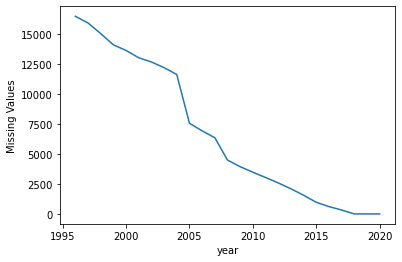

In [8]:
all_years = list(range(1996,2021))
null_count = []

for ay in all_years:
    nullSum = housingRAW[f'{str(ay)}-12-31'].isnull().sum()
    null_count.append(nullSum)
    
plt.plot(all_years,null_count)
plt.xlabel("year")
plt.ylabel("Missing Values")

Based upon the decreasing number of null values (missing values) for individual zip codes as date increases in recency. We establish the cutoff for our data at 2010. 

In [9]:
month_days_NL = ['01-31','02-28','03-31','04-30','05-31','06-30','07-31','08-31','09-30','10-31','11-30','12-31'] # Normal year last day of the month
month_days_L = ['01-31','02-29','03-31','04-30','05-31','06-30','07-31','08-31','09-30','10-31','11-30','12-31']  # Leap year last day of the month
years = list(range(1996,2015))

def drop_y_m_d(df,day,year):
    drop_col = str(year) + '-' + day
    df.drop(drop_col,axis=1,inplace=True)

#loop to drop all dates before 1-31-2016 taking care to include leap years
for y in years:
    if y % 4 != 0:
        #common year
        for d_m in month_days_NL:
            drop_y_m_d(housingRAW,d_m,y)
    elif y % 100 != 0:
        #leap year
        for d_m in month_days_L:
            drop_y_m_d(housingRAW,d_m,y)
    elif y % 400 != 0:
        #common year
        for d_m in month_days_NL:
            drop_y_m_d(housingRAW,d_m,y)
    else:
        #leap year
        for d_m in month_days_L:
            drop_y_m_d(housingRAW,d_m,y)

            
month_days_NL = ['02-28','03-31','04-30','05-31','06-30','07-31','08-31','09-30','10-31','11-30','12-31'] # Normal year last day of the month
month_days_L = ['02-29','03-31','04-30','05-31','06-30','07-31','08-31','09-30','10-31','11-30','12-31']  # Leap year last day of the month
years = list(range(2015,2021))

def drop_y_m_d(df,day,year):
    drop_col = str(year) + '-' + day
    df.drop(drop_col,axis=1,inplace=True)

#loop to drop all dates before 1-31-2016 taking care to include leap years
for y in years:
    if y % 4 != 0:
        #common year
        for d_m in month_days_NL:
            drop_y_m_d(housingRAW,d_m,y)
    elif y % 100 != 0:
        #leap year
        for d_m in month_days_L:
            drop_y_m_d(housingRAW,d_m,y)
    elif y % 400 != 0:
        #common year
        for d_m in month_days_NL:
            drop_y_m_d(housingRAW,d_m,y)
    else:
        #leap year
        for d_m in month_days_L:
            drop_y_m_d(housingRAW,d_m,y)

In [10]:
#Finally drop all rows in all dataFrames with missing values
housing = housingRAW.dropna()
brewery = breweryRAW.dropna()
income  = incomeRAW.dropna()
pop     = popRAW.dropna()

### sort data sets according to zip code in descending order
housing.sort_values(by=['zip'])
brewery.sort_values(by=['zip'])
income.sort_values(by=['zip'])
pop.sort_values(by=['zip'])

housing.drop_duplicates(subset=['zip'],inplace=True)
brewery.drop_duplicates(subset=['zip'],inplace=True)
income.drop_duplicates(subset=['zip'],inplace=True)
pop.drop_duplicates(subset=['zip'],inplace=True)
#

In [11]:
breweryRAW['zip']=breweryRAW['zip'].astype(str).str[0:5] ## fixing zip codes with specific area codes

num_brew = breweryRAW.pivot_table(index=['zip'], aggfunc='size')
num_brew = pd.DataFrame(num_brew)
num_brew.reset_index(inplace=True)
num_brew.columns = ['zip','B_num']
brewery = num_brew.drop(6106)

In [12]:
brewery

,zip,B_num
0,01606,1
1,02127,2
2,02169,1
3,02860,1
4,03301,1
...,...,...
6101,99801,4
6102,99829,1
6103,99835,2
6104,99840,1


In [13]:
### Proposed solution for missing zip codes in Brewery dataset if access to GoogleMaps API is available ###

#import googlemaps

#gmaps = googlemaps.Client(key='')

#breweryRAW["B_zip"] = breweryRAW["B_zip"].fillna(gmaps.geocode(breweryRAW["B_address"] + ' , ' + breweryRAW["B_city"])['Placemark'][0]['AddressDetails']['Country']['AdministrativeArea']['Locality']['PostalCode']['PostalCodeNumber'])


In [14]:
brewery
brewery['zip']=brewery['zip'].astype(str).str[0:5] ## fixing zip codes with specific area codes
brewery.zip.astype(int)

0        1606
1        2127
2        2169
3        2860
4        3301
        ...  
6101    99801
6102    99829
6103    99835
6104    99840
6105    99901
Name: zip, Length: 6106, dtype: int32

In [73]:
### Merge Datasets
housing.zip.astype(int)

brewery['zip']=brewery['zip'].astype(str).str[0:5] ## fixing zip codes with specific area codes
brewery.zip = brewery.zip.astype(int)

income.zip.astype(int)

pop.zip.astype(int)

master = pop.merge(income, on='zip',how='inner') ## inner merge #1
master = master.merge(housing, on='zip',how='inner')     ## #2
master = master.merge(brewery, on='zip',how='left') ## left merge 

master.columns

master['B_num'].fillna(0,inplace=True)

In [53]:
### master dataset containing all relevant data
master

,P_pop,zip,I_city,I_mean,I_median,I_Stdev,H_rank,H_state,H_city,2015-01-31,2016-01-31,2017-01-31,2018-01-31,2019-01-31,2020-01-31,2021-01-31,B_num
0,1389,95117,San Jose,113319,95226,80222,20959,AZ,Vernon,171403.0,180151.0,192372.0,203874.0,210632.0,222985.0,240066.0,0.0
1,231,74074,Stillwater,47471,28080,47291,14310,AL,Notasulga,71599.0,75422.0,78100.0,82921.0,89686.0,94850.0,99518.0,0.0
2,150,62626,Carlinville,64871,300000,33013,21924,NY,Town Of Claverack,181221.0,185850.0,186949.0,198560.0,219749.0,220639.0,237148.0,0.0
3,443,97037,Maupin,46804,39132,34510,13403,CA,Brea,729687.0,761846.0,784958.0,816212.0,816018.0,824395.0,890563.0,0.0
4,19,67834,Bucklin,66739,51910,53848,8151,VA,Emporia,76210.0,76743.0,76738.0,76392.0,76756.0,78389.0,84308.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,710,85021,Phoenix,75338,300000,59932,26351,IL,Benson,73335.0,76278.0,78690.0,81875.0,83922.0,85577.0,88387.0,2.0
3933,138,63146,St Louis,80171,72097,52581,15980,NY,Town Of Sangerfield,111954.0,114589.0,113345.0,119604.0,127811.0,139407.0,143674.0,0.0
3934,5,80825,Kit Carson,47895,42616,37787,14698,IA,Peosta,234711.0,242542.0,246169.0,257568.0,264573.0,276515.0,293521.0,0.0
3935,1057,80104,Castle Rock,96326,82953,59138,21410,IA,Cambridge,146784.0,154445.0,164019.0,168517.0,173460.0,180305.0,189467.0,2.0


In [74]:
from sklearn.linear_model import LinearRegression

### This section reduces the 7 years of house prices to one variable their charge over this same time frame (slope of a regression fit to this data)

slope = []
X = np.array([2015,2016,2017,2018,2019,2020,2021])

for index, row in master.iterrows():
    y = np.array([row['2015-01-31'],row['2016-01-31'],row['2017-01-31'],row['2018-01-31'],row['2019-01-31'],row['2020-01-31'],row['2021-01-31']])
    slope.append(LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1)).coef_)
    
slopeDF = pd.DataFrame(np.array(slope).reshape(-1))

master = pd.concat((master,slopeDF[0]),axis=1)

In [75]:
master.drop(values,axis=1,inplace=True)
master.drop('H_city',axis=1,inplace=True)

In [78]:
master.columns = ['pop','zip','city','I_mean','I_median','I_stdev','I_rank','state','B_num','H_slope']
master

,pop,zip,city,I_mean,I_median,I_stdev,I_rank,state,B_num,H_slope
0,1389,95117,San Jose,113319,95226,80222,20959,AZ,0.0,11068.464286
1,231,74074,Stillwater,47471,28080,47291,14310,AL,0.0,4792.821429
2,150,62626,Carlinville,64871,300000,33013,21924,NY,0.0,9648.535714
3,443,97037,Maupin,46804,39132,34510,13403,CA,0.0,22813.785714
4,19,67834,Bucklin,66739,51910,53848,8151,VA,0.0,985.857143
...,...,...,...,...,...,...,...,...,...,...
3932,710,85021,Phoenix,75338,300000,59932,26351,IL,2.0,2463.785714
3933,138,63146,St Louis,80171,72097,52581,15980,NY,0.0,5687.928571
3934,5,80825,Kit Carson,47895,42616,37787,14698,IA,0.0,9385.000000
3935,1057,80104,Castle Rock,96326,82953,59138,21410,IA,2.0,6757.500000


In [79]:
master.to_csv('../Data/master.csv')
master.corr()['B_num']

pop         0.088429
zip         0.216358
I_mean      0.137930
I_median    0.062011
I_stdev     0.152161
I_rank     -0.013626
B_num       1.000000
H_slope     0.076568
Name: B_num, dtype: float64